In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model  import LinearRegression



In [4]:
def norm_func(i):
    x = (i-i.min())	/	(i.max()	-	i.min())
    return (x)

data=pd.read_csv("C://Users//Rahul//Desktop//Kaggle//Linear Regression//CAR DETAILS FROM CAR DEKHO.csv")
data.info()
data.head()
data.columns



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner'],
      dtype='object')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   name           4340 non-null   int32
 1   year           4340 non-null   int64
 2   selling_price  4340 non-null   int64
 3   km_driven      4340 non-null   int64
 4   fuel           4340 non-null   int32
 5   seller_type    4340 non-null   int32
 6   transmission   4340 non-null   int32
 7   owner          4340 non-null   int32
dtypes: int32(5), int64(3)
memory usage: 186.6 KB


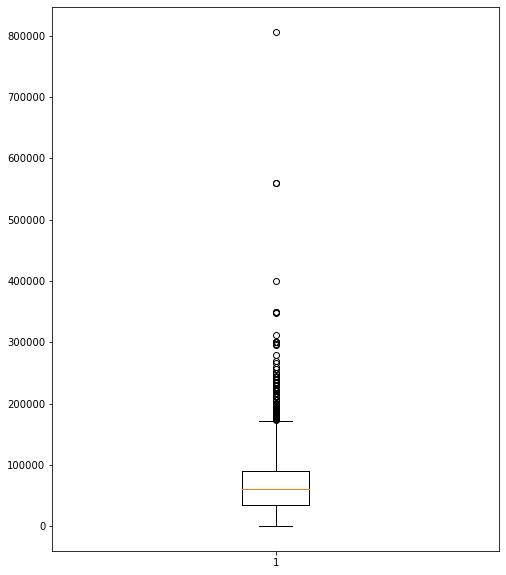

In [5]:
column = data.dtypes==object
ocolumn = data.columns[column].tolist()
le = LabelEncoder()
data[ocolumn] = data[ocolumn].apply(lambda col: le.fit_transform(col))

data.info()

data.describe()

data.isnull().sum()
x=data[['name', 'year','km_driven', 'fuel', 'seller_type',
       'transmission', 'owner']]
y=data[['selling_price']]

x=norm_func(x)

plt.figure(figsize=(8,10))
plt.boxplot(data['km_driven'])
plt.show()



,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
name,1.000000,-0.051902,-0.077598,0.126203,-0.083927,0.140802,0.087785,0.032819
year,-0.051902,1.000000,0.413922,-0.419688,-0.120002,-0.098352,-0.143800,-0.414705
selling_price,-0.077598,0.413922,1.000000,-0.192289,-0.269653,-0.151554,-0.530205,-0.207840
km_driven,0.126203,-0.419688,-0.192289,1.000000,-0.286095,0.113689,0.120226,0.297115
fuel,-0.083927,-0.120002,-0.269653,-0.286095,1.000000,0.038797,0.039249,-0.010910
seller_type,0.140802,-0.098352,-0.151554,0.113689,0.038797,1.000000,0.174925,0.165681
transmission,0.087785,-0.143800,-0.530205,0.120226,0.039249,0.174925,1.000000,0.078893
owner,0.032819,-0.414705,-0.207840,0.297115,-0.010910,0.165681,0.078893,1.000000


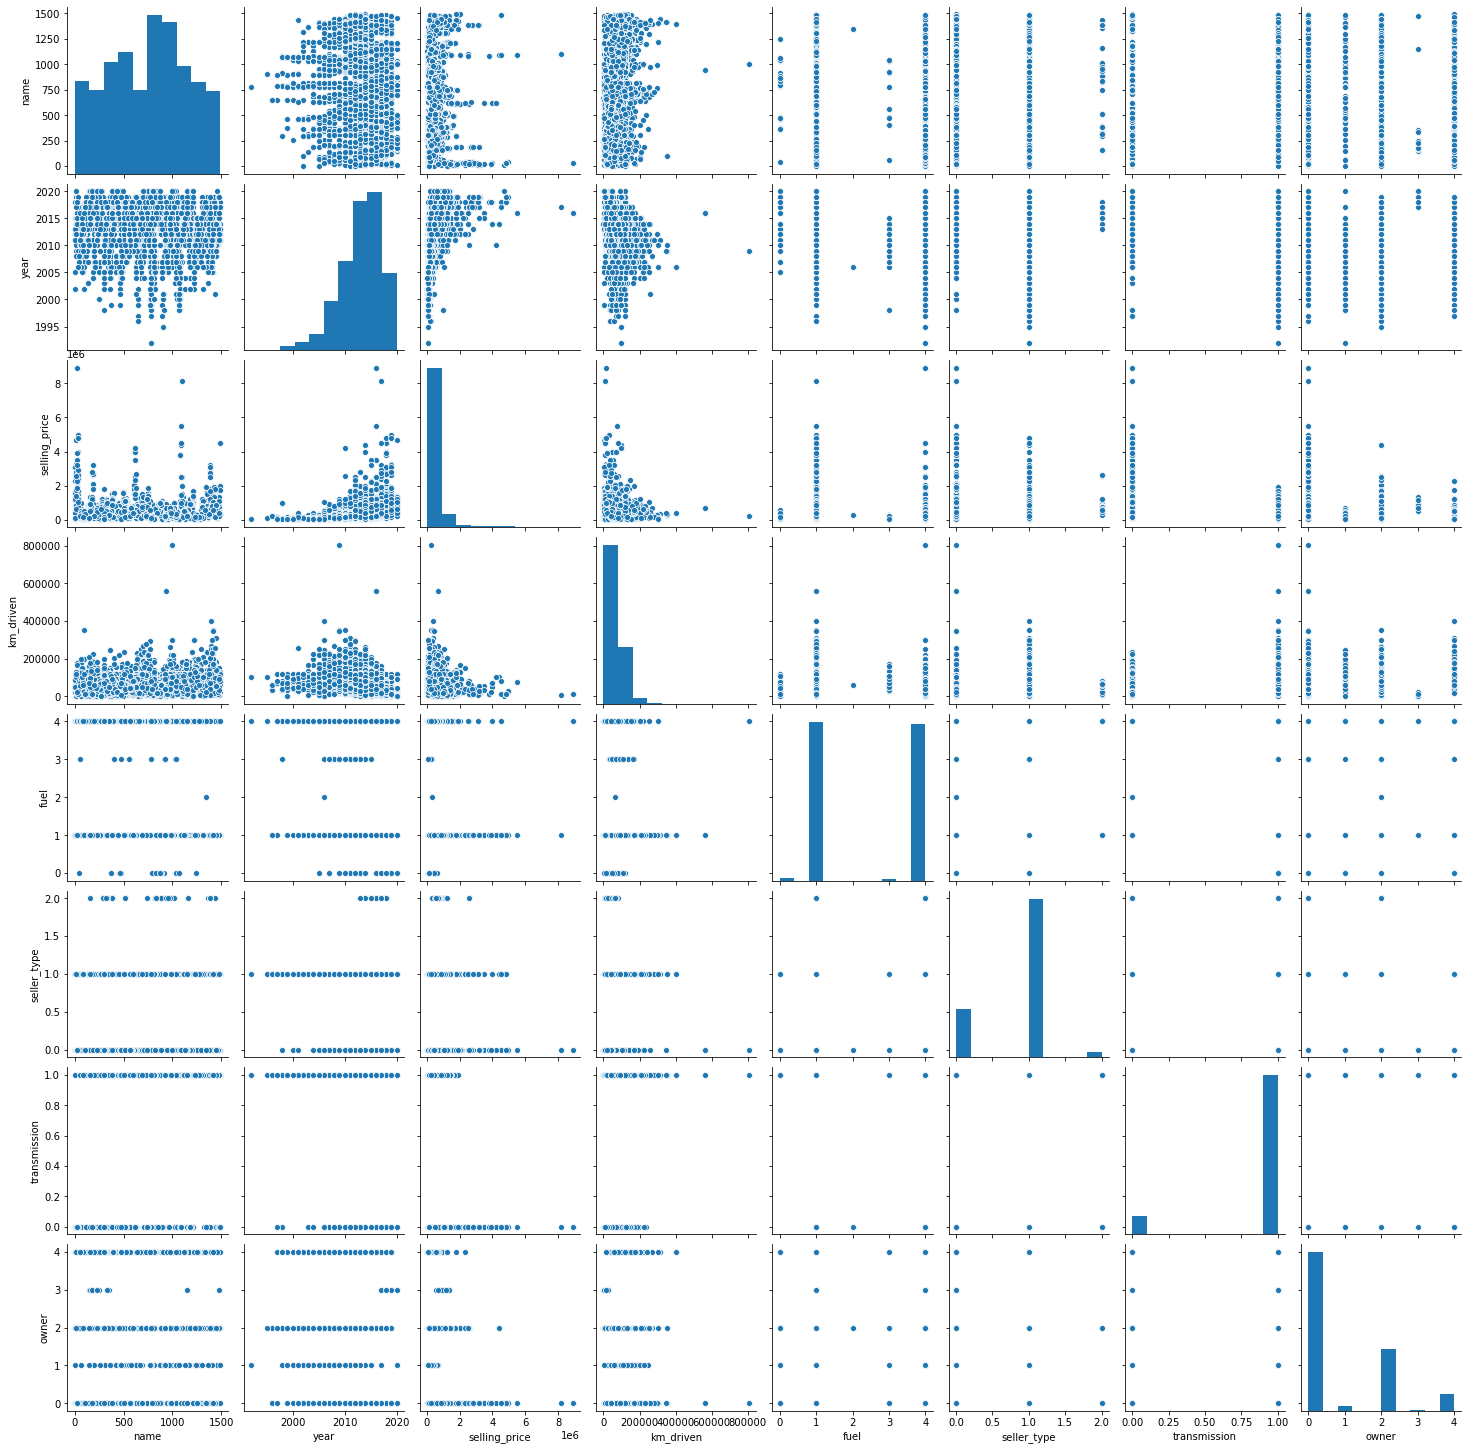

In [6]:
from seaborn import pairplot
import statsmodels.api as sm


pairplot(data)

data.corr()




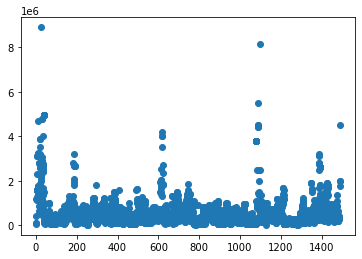

In [7]:
m1 = smf.ols('selling_price~name+year+km_driven+fuel+seller_type+transmission+owner',data=data).fit()


m1.params


m1.summary()

plt.scatter('name','selling_price',data=data)




In [8]:
import statsmodels.api as sm

#sm.graphics.influence_plot(m1,size=10)
data=data.drop(data.index[[1243,525,528,3679,4184,4184]])

x=data[['name', 'year','km_driven', 'fuel', 'seller_type',
       'transmission', 'owner']]
y=data[['selling_price']]




In [10]:
m2= smf.ols('np.log(y)~x',data=data).fit()
m2.summary()
m2.rsquared,m2.aic





(0.6680138349500344, 6021.413286703944)

In [11]:
model = LinearRegression()
model.fit(x,np.log(y))
model.score(x,np.log(y))

0.6680138349500351